In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy 
import cv2
import os
import argparse
import pandas as pd

import EigenFace as EF

# Experiment (A): Use fa_H for training (i.e., to compute the eigenfaces and build the gallery set) and fb_H for testing (query). So, there will be 1204 images for training and 1196 images for testing.

## Training phase:

In [2]:
training_dir_highres ="Faces_FA_FB/fa_H/"
#print(os.listdir(training_dir_), len(os.listdir(dir_)))

experiment_a = EF.EigenFaces(mode='train')

experiment_a.read_images(training_dir_highres)
experiment_a.find_eigenfaces()
experiment_a.get_eigen_coefficients()

experiment_a.save_data(filename='training_data_highres')

data saved as file training_data_highres.npz


In [ ]:
def read_images(self,directory):
    images = []
    image_ids = []
    for i in os.listdir(directory):
        if i.endswith('.tif'):
            images.append(cv2.imread(directory+i, cv2.IMREAD_GRAYSCALE))
            image_ids.append(i[0:5])
            self.image_height = images[0].shape[0]
            self.image_width = images[0].shape[1]

## (a.I) Show (as an image) the following:


### The average face


Text(0.5, 1.0, 'Average Face \n High Resolution')

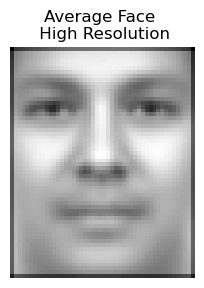

In [3]:
fig = plt.subplots(figsize=(5,3))
plt.imshow(experiment_a.mean_face,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Average Face \n High Resolution')

### The eigenfaces corresponding to the 10 largest eigenvalues and the eigenfaces corresponding to the 10 smallest eigenvalues.


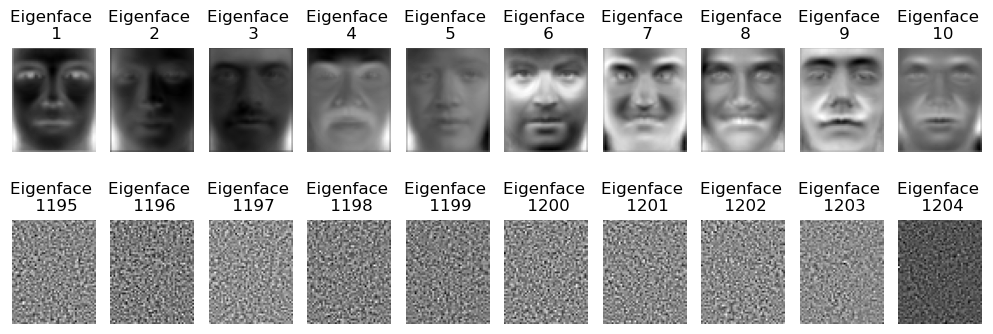

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=10, layout='tight', figsize=(10,4))
for i in range(10):
    ax[0,i].imshow(experiment_a.eigenfaces[:,i].reshape(60,48),cmap = plt.cm.gray)
    ax[0,i].set_title('Eigenface \n %s' % (i+1))
    ax[0,i].axis('off')
for j,i in enumerate(np.arange(1194,1204)):
    ax[1,j].imshow(experiment_a.eigenfaces[:,i].reshape(60,48),cmap = plt.cm.gray)
    ax[1,j].set_title('Eigenface \n %s' % (i+1))
    ax[1,j].axis('off')

## Testing phase:

## (a.II) In this experiment, consider the top eigenvectors (eigenfaces) preserving 80% of the information in the data. Project the query images onto this set of eigenvectors after subtracting the average face (from the training set). Then, compute the Mahalanobis distance between the eigen-coefficient vectors for each pair of training and query images as the matching distance.

In [5]:
test_dir_highres ="Faces_FA_FB/fb_H/"

In [6]:
# change mode to testing and then read in the test images
experiment_a.mode='test'
experiment_a.read_images(test_dir_highres)
experiment_a.get_eigen_coefficients()



### *Note: if you want to skip running the training phase and instead use the precomputed training data, you can simply initialize with the saved data by running:*

####            >>  trainingdata = np.load('training_data_highres.npz')
####            >>  experiment_a = EF.EigenFaces(mode='test', preloaded_training_data=trainingdata) 

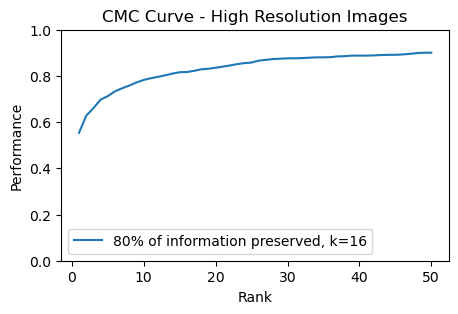

In [7]:
highres_80p_df = experiment_a.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.8)

highres_thresh_80percent = []

for i in np.arange(1,51):
    highres_thresh_80percent.append(np.sum(highres_80p_df['isMatch_r'+str(i)])/ len(highres_80p_df))

    
fig= plt.subplots(figsize=(5,3))    
plt.plot(np.arange(1,51),highres_thresh_80percent, label='80% of information preserved, k=' + '%s' % experiment_a.k)
plt.ylim(0,1)    
plt.xlabel('Rank')
plt.ylabel('Performance')
plt.title('CMC Curve - High Resolution Images')
plt.legend()

## (a.III) Assuming r=1, show 3 query images that are correctly matched, along with the corresponding best matched training samples.

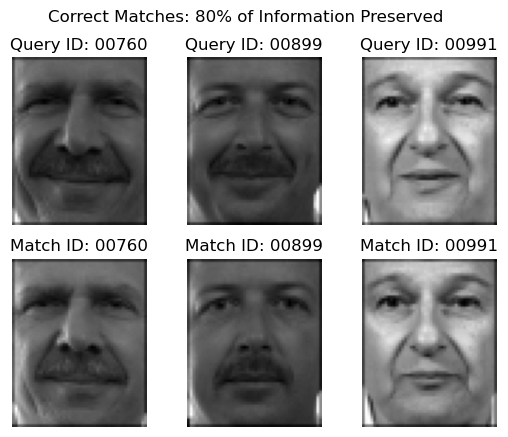

In [8]:
correct_r1s = highres_80p_df[highres_80p_df.isMatch_r1==True]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 80% of Information Preserved\n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')


## (a.IV) Assuming r=1, show 3 query images that are incorrectly matched, along with the corresponding mismatched training samples.

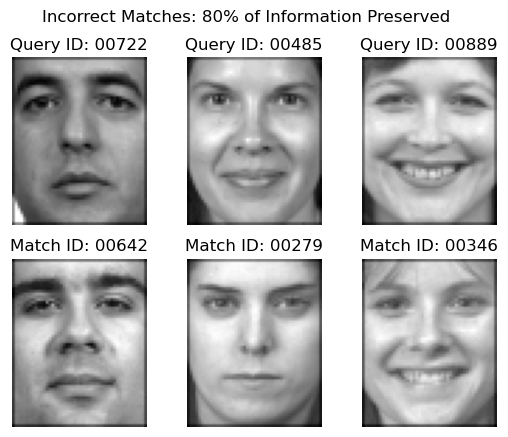

In [9]:
incorrect_r1s = highres_80p_df[highres_80p_df.isMatch_r1==False]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(incorrect_r1s), 3)):
    plt.suptitle('Incorrect Matches: 80% of Information Preserved\n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

## (a.V) Repeat (a.II – a.IV) by keeping the top eigenvectors corresponding to 90% and 95% of the information in the data. Plot the CMC curves on the same graph for comparison purposes. If there are significant differences in terms of identification accuracy in (a.II) and (a.V), try to explain why. If there are no significant differences, explain why too.

### 90% of information in data

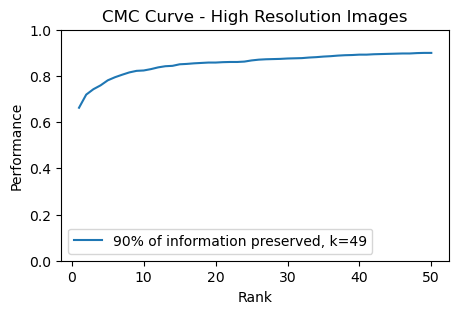

In [10]:
highres_90p_df = experiment_a.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.9)

highres_thresh_90percent = []

for i in np.arange(1,51):
    highres_thresh_90percent.append(np.sum(highres_90p_df['isMatch_r'+str(i)])/ len(highres_90p_df))
    #plt.plot(i, np.sum(q['isMatch_r'+str(i)])/ len(q),'.')
    

fig= plt.subplots(figsize=(5,3))
plt.plot(np.arange(1,51),highres_thresh_90percent, label=('90% of information preserved, k=' + '%s' % experiment_a.k))
plt.ylim(0,1)    
plt.xlabel('Rank')
plt.ylabel('Performance')
plt.title('CMC Curve - High Resolution Images')
plt.legend()

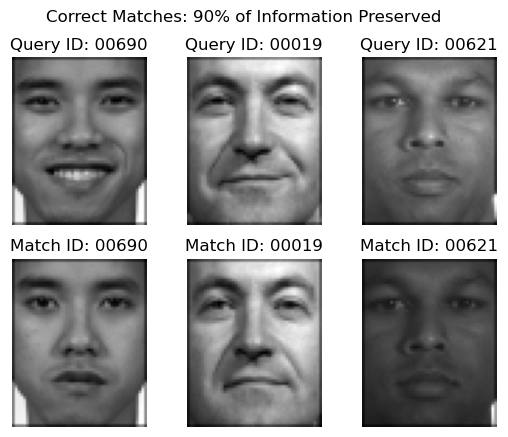

In [11]:
correct_r1s = highres_90p_df[highres_90p_df.isMatch_r1==True]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 90% of Information Preserved \n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

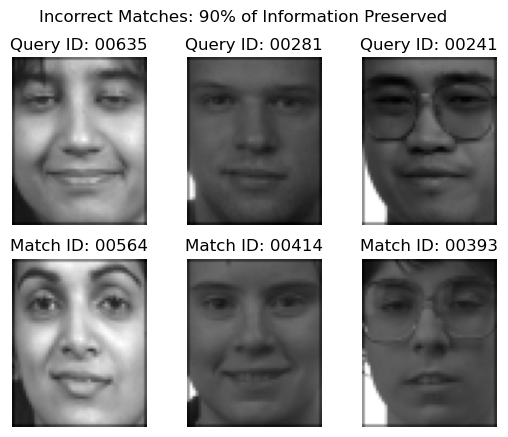

In [12]:
incorrect_r1s = highres_90p_df[highres_90p_df.isMatch_r1==False]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(incorrect_r1s), 3)):
    plt.suptitle('Incorrect Matches: 90% of Information Preserved \n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

### 95% of information in data

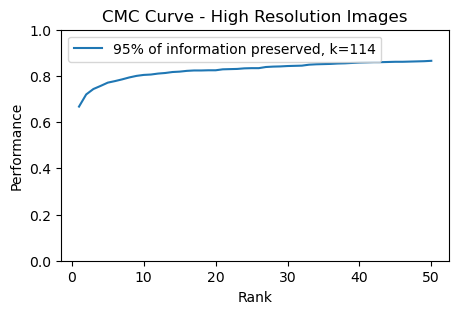

In [13]:
highres_95p_df = experiment_a.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.95)

highres_thresh_95percent = []

for i in np.arange(1,51):
    highres_thresh_95percent.append(np.sum(highres_95p_df['isMatch_r'+str(i)])/ len(highres_95p_df))


fig= plt.subplots(figsize=(5,3))
plt.plot(np.arange(1,51),highres_thresh_95percent, label=('95% of information preserved, k=' + '%s' % experiment_a.k))
plt.ylim(0,1)    
plt.xlabel('Rank')
plt.ylabel('Performance')
plt.title('CMC Curve - High Resolution Images')
plt.legend()

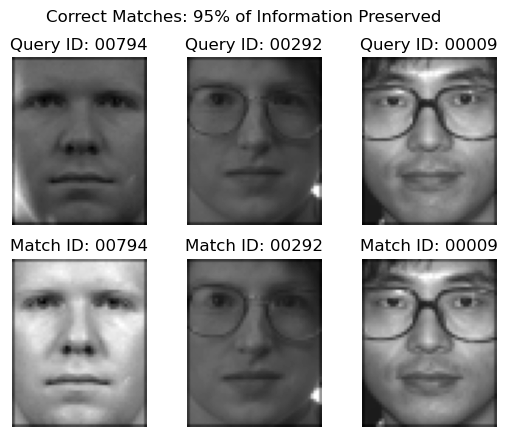

In [14]:
correct_r1s = highres_95p_df[highres_95p_df.isMatch_r1==True]

fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 95% of Information Preserved \n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

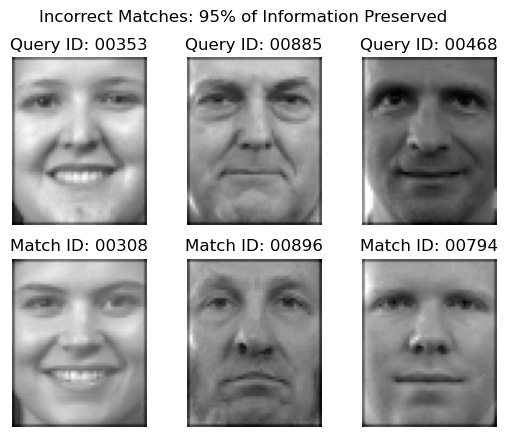

In [15]:
incorrect_r1s = highres_95p_df[highres_95p_df.isMatch_r1==False]

fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(incorrect_r1s), 3)):
    plt.suptitle('Incorrect Matches: 95% of Information Preserved \n \n \n')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_a.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_a.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

### plotting all CMC Curves together

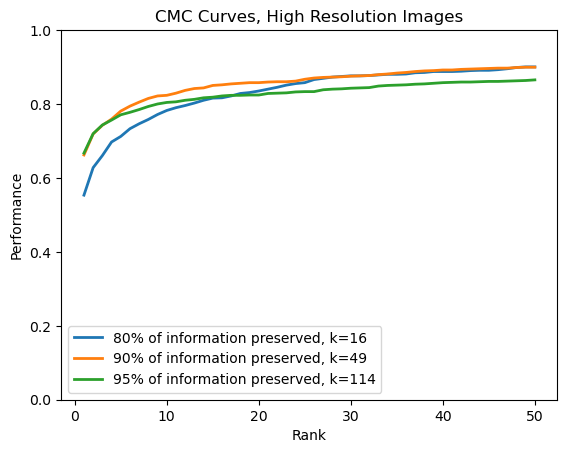

In [16]:
plt.title('CMC Curves, High Resolution Images')
plt.plot(np.arange(1,51),highres_thresh_80percent,lw=2, label='80% of information preserved, k=16')
plt.plot(np.arange(1,51),highres_thresh_90percent,lw=2, label='90% of information preserved, k=49')
plt.plot(np.arange(1,51),highres_thresh_95percent,lw=2, label='95% of information preserved, k=114')
plt.ylim(0,1)    
plt.xlabel('Rank')
plt.ylabel('Performance')
plt.legend()

# Experiment (b) In this experiment, you will test the performance of the eigenface approach on faces not in the gallery set (i.e., intruders).

## For this, remove all the images corresponding to the first 50 subjects in fa_H (please note that a given subject might have more than one image in fa_H); let’s call the reduced set fa2_H.




In [17]:
training_dir_reduced ="Faces_FA_FB/fa2_H/"
test_dir_highres ="Faces_FA_FB/fb_H/"


experiment_b = EF.EigenFaces(mode='train')
experiment_b.read_images(training_dir_reduced)
experiment_b.find_eigenfaces()
experiment_b.get_eigen_coefficients()
experiment_b.save_data(filename='training_data_highres_intruders')

data saved as file training_data_highres_intruders.npz


## Perform recognition using fa2_H for training (gallery) and fb_H for testing (query). Since the training set has changed, you would need to compute a new eigenspace for this experiment (i.e., compute the new covariance matrix and its eigenvalues/eigenvectors). Use the eigenvectors corresponding to 95% of the information in the data (i.e., do not experiment with different percentages as in (a)).

In [18]:
trained_data = np.load('training_data_highres_intruders.npz')

experiment_b = EF.EigenFaces(mode='test', preloaded_training_data=trained_data)
experiment_b.read_images(test_dir_highres)
experiment_b.get_intruder_info(training_dir_highres, n_remove=50)
experiment_b.get_eigen_coefficients(thresh=0.95)

In [19]:
experiment_b.recognize_faces(n_faces='all', rank=1, check_matches=[1], thresh=0.95)

,query_id,query_idx,best_match,match_idx,dist_error,isMatch_r1
0,00514,0,[00514],[333],[43.41029273792352],True
1,00146,1,[00146],[83],[55.8232479666125],True
2,00571,2,[00571],[87],[28.61280568772876],True
3,00441,3,[00300],[698],[83.61307999242855],False
4,00875,4,[00875],[89],[184.8542201129846],True
...,...,...,...,...,...,...
1191,00925,1191,[00925],[1043],[54.49363438864108],True
1192,00878,1192,[00878],[1048],[100.54027191685259],True
1193,00427,1193,[00427],[1047],[23.59255296984264],True
1194,00998,1194,[00998],[1046],[76.63102920033884],True


In [20]:
experiment_b.get_ROC_error_info()

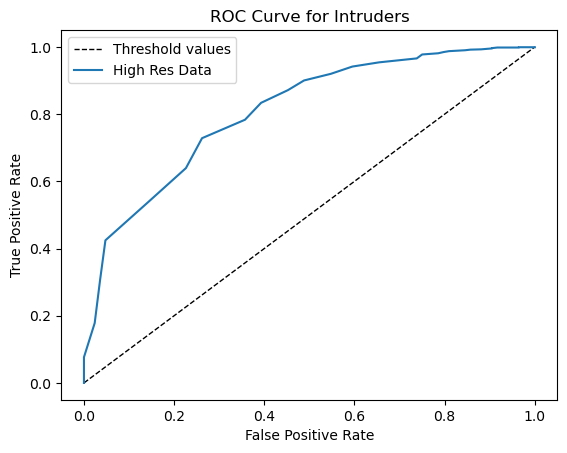

In [21]:
plt.title('ROC Curve for Intruders')
plt.plot(experiment_b.ROC_thresholds, experiment_b.ROC_thresholds,'--', lw=1, color='k', label='Threshold values')
plt.plot(experiment_b.false_positive_rate, experiment_b.true_positive_rate, label='High Res Data')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

# Experiment C: Repeat experiment (a) using fa_L for training (gallery) and fb_L for testing.

In [22]:
training_dir_lowres ="Faces_FA_FB/fa_L/"

experiment_c = EF.EigenFaces(mode='train')

experiment_c.read_images(training_dir_lowres)
experiment_c.find_eigenfaces()
experiment_c.get_eigen_coefficients()

experiment_c.save_data(filename='training_data_lowres')

data saved as file training_data_lowres.npz


## (c.I) Show (as an image) the following:


### The average face


Text(0.5, 1.0, 'Average Face \n Low Resolution')

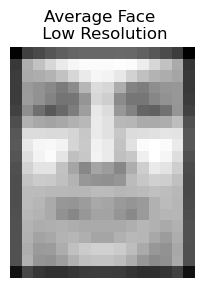

In [23]:
fig = plt.subplots(figsize=(5,3))
plt.imshow(experiment_c.mean_face,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Average Face \n Low Resolution')

### The eigenfaces corresponding to the 10 largest eigenvalues and the eigenfaces corresponding to the 10 smallest eigenvalues.

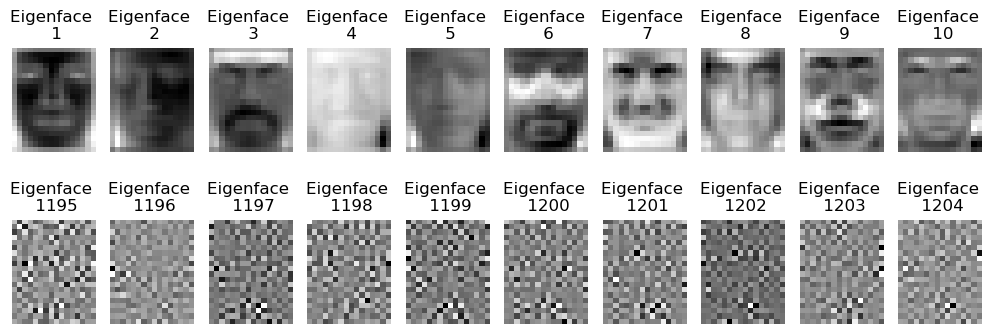

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=10, layout='tight', figsize=(10,4))
for i in range(10):
    ax[0,i].imshow(experiment_c.eigenfaces[:,i].reshape(experiment_c.image_height,experiment_c.image_width),cmap = plt.cm.gray)
    ax[0,i].set_title('Eigenface \n %s' % (i+1))
    ax[0,i].axis('off')
for j,i in enumerate(np.arange(1194,1204)):
    ax[1,j].imshow(experiment_c.eigenfaces[:,i].reshape(experiment_c.image_height,experiment_c.image_width),cmap = plt.cm.gray)
    ax[1,j].set_title('Eigenface \n %s' % (i+1))
    ax[1,j].axis('off')

## Testing phase:

## (c.II) In this experiment, consider the top eigenvectors (eigenfaces) preserving 80% of the information in the data. Project the query images onto this set of eigenvectors after subtracting the average face (from the training set). Then, compute the Mahalanobis distance between the eigen-coefficient vectors for each pair of training and query images as the matching distance.

In [25]:
test_dir_lowres ="Faces_FA_FB/fb_L/"

experiment_c.mode='test'

experiment_c.read_images(test_dir_lowres)

experiment_c.get_eigen_coefficients()

### *Note: if you want to skip running the training phase and instead use the precomputed training data, you can simply initialize with the saved data by running:* 

####            >>  trainingdata = np.load('training_data_lowres.npz')
####            >>  experiment_c = EF.EigenFaces(mode='test', preloaded_training_data=trainingdata) 

In [26]:
lowres_80p_df = experiment_c.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.8)

lowres_thresh_80percent = []

for i in np.arange(1,51):
    lowres_thresh_80percent.append(np.sum(lowres_80p_df['isMatch_r'+str(i)])/ len(lowres_80p_df))

print('k eigenfaces used:', experiment_c.k)

k eigenfaces used: 9


## (c.III) Assuming r=1, show 3 query images that are correctly matched, along with the corresponding best matched training samples.

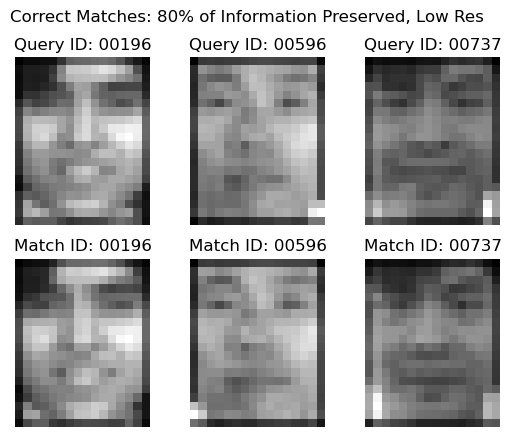

In [27]:
correct_r1s = lowres_80p_df[lowres_80p_df.isMatch_r1==True]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 80% of Information Preserved, Low Res \n\n\n\n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')


## (c.IV) Assuming r=1, show 3 query images that are incorrectly matched, along with the corresponding mismatched training samples.

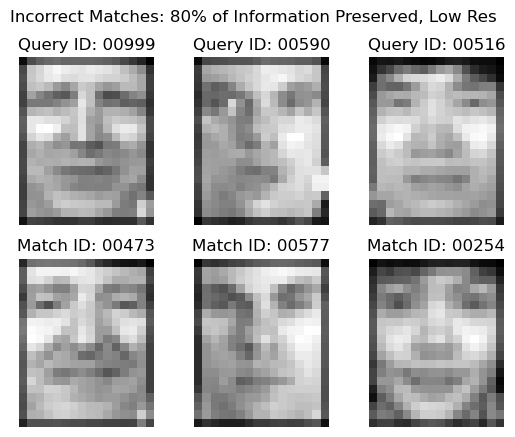

In [28]:
incorrect_r1s = lowres_80p_df[lowres_80p_df.isMatch_r1==False]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Incorrect Matches: 80% of Information Preserved, Low Res')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

## (c.V) Repeat (c.II – c.IV) by keeping the top eigenvectors corresponding to 90% and 95% of the information in the data. Plot the CMC curves on the same graph for comparison purposes. If there are significant differences in terms of identification accuracy in (a.II) and (a.V), try to explain why. If there are no significant differences, explain why too.

### 90% of information in data

In [29]:
lowres_90p_df = experiment_c.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.9)

lowres_thresh_90percent = []

for i in np.arange(1,51):
    lowres_thresh_90percent.append(np.sum(lowres_90p_df['isMatch_r'+str(i)])/ len(lowres_90p_df))

print('k eigenfaces used:', experiment_c.k)

k eigenfaces used: 19


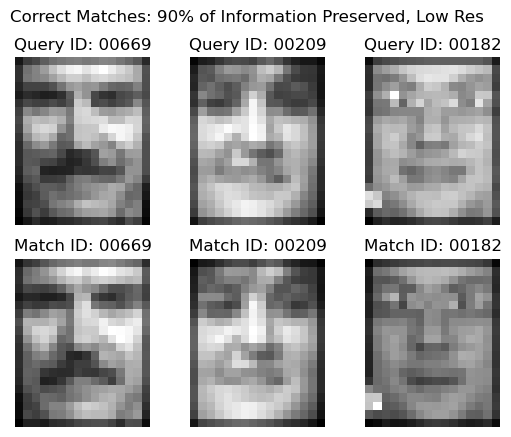

In [30]:
correct_r1s = lowres_90p_df[lowres_90p_df.isMatch_r1==True]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 90% of Information Preserved, Low Res \n\n\n\n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

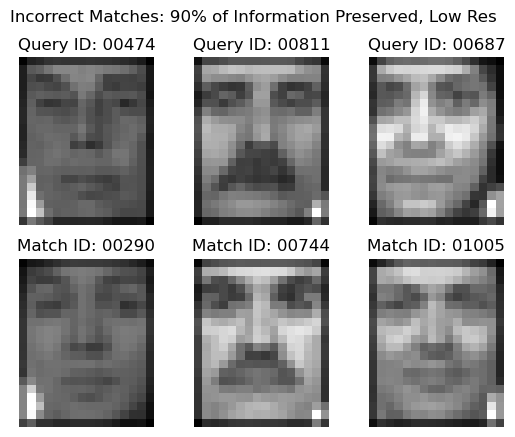

In [31]:
incorrect_r1s = lowres_90p_df[lowres_90p_df.isMatch_r1==False]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(incorrect_r1s), 3)):
    plt.suptitle('Incorrect Matches: 90% of Information Preserved, Low Res')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

### 95% of information in data

In [32]:
lowres_95p_df = experiment_c.recognize_faces(n_faces='all', rank=50, check_matches=np.arange(1,51), thresh=0.95)

lowres_thresh_95percent = []

for i in np.arange(1,51):
    lowres_thresh_95percent.append(np.sum(lowres_95p_df['isMatch_r'+str(i)])/ len(lowres_95p_df))

print('k eigenfaces used:', experiment_c.k)

k eigenfaces used: 40


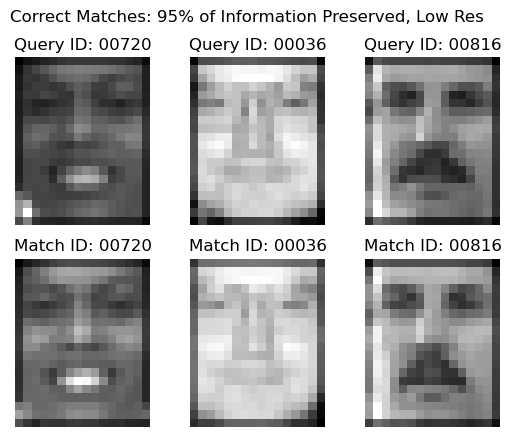

In [33]:
correct_r1s = lowres_95p_df[lowres_95p_df.isMatch_r1==True]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(correct_r1s), 3)):
    plt.suptitle('Correct Matches: 95% of Information Preserved, Low Res \n\n\n\n')
    
    ax[0,j].set_title('Query ID: %s' % correct_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % correct_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[correct_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[correct_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

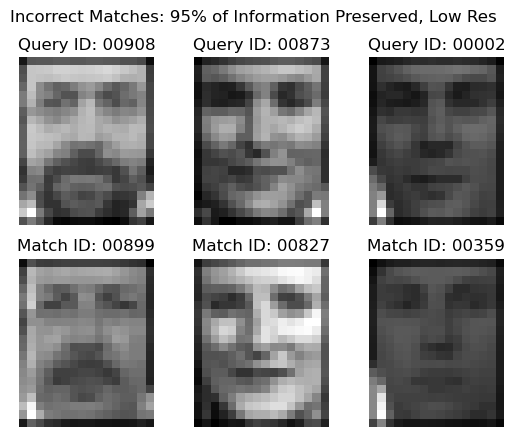

In [34]:
incorrect_r1s = lowres_95p_df[lowres_95p_df.isMatch_r1==False]
fig,ax = plt.subplots(nrows=2, ncols=3)
for j,i in enumerate(np.random.choice(len(incorrect_r1s), 3)):
    plt.suptitle('Incorrect Matches: 95% of Information Preserved, Low Res')
    
    ax[0,j].set_title('Query ID: %s' % incorrect_r1s.query_id.iloc[i])
    ax[1,j].set_title('Match ID: %s' % incorrect_r1s.best_match.iloc[i][0])
    
    ax[0,j].imshow(experiment_c.test_images[incorrect_r1s.query_idx.iloc[i]],cmap = plt.cm.gray)
    ax[1,j].imshow(experiment_c.training_images[incorrect_r1s.match_idx.iloc[i][0]],cmap = plt.cm.gray)
    
    ax[0,j].axis('off')
    ax[1,j].axis('off')

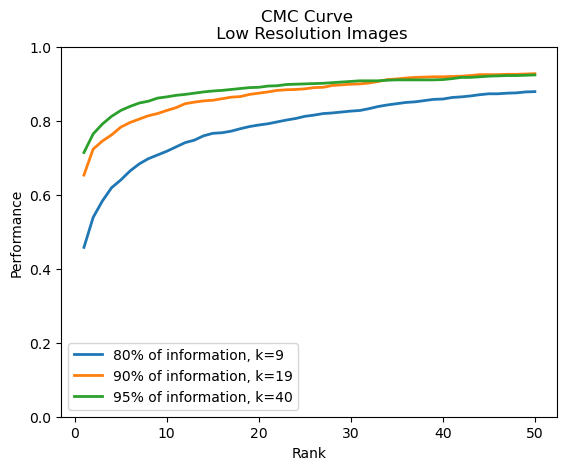

In [35]:
plt.title('CMC Curve \n Low Resolution Images')
plt.plot(np.arange(1,51),lowres_thresh_80percent,lw=2, label='80% of information, k=9')
plt.plot(np.arange(1,51),lowres_thresh_90percent,lw=2, label='90% of information, k=19')
plt.plot(np.arange(1,51),lowres_thresh_95percent,lw=2, label='95% of information, k=40')
plt.ylim(0,1)    
plt.xlabel('Rank')
plt.ylabel('Performance')
plt.legend()

# Experiment (d): Remove all the images of the first 50 subjects from fa_L; let’s call the reduced set as fa2_L. Repeat experiment (b) using fa2_L for training (gallery) and fb_L for testing.

In [36]:
training_dir_reduced_lowres ="Faces_FA_FB/fa2_L/"

experiment_d = EF.EigenFaces(mode='train')

experiment_d.read_images(training_dir_reduced_lowres)
experiment_d.find_eigenfaces()
experiment_d.get_eigen_coefficients()

experiment_d.save_data(filename='training_data_lowres_intruders')

data saved as file training_data_lowres_intruders.npz


## Perform recognition using fa2_L for training (gallery) and fb_L for testing (query). Since the training set has changed, you would need to compute a new eigenspace for this experiment (i.e., compute the new covariance matrix and its eigenvalues/eigenvectors). Use the eigenvectors corresponding to 95% of the information in the data (i.e., do not experiment with different percentages as in (a)).

In [37]:
experiment_d.mode='test'
experiment_d.read_images(test_dir_lowres)
experiment_d.get_eigen_coefficients(thresh=0.95)

In [38]:
experiment_d.recognize_faces(n_faces='all', rank=1, check_matches=[1], thresh=0.95)
experiment_d.get_intruder_info(training_dir_lowres, n_remove=50)
experiment_d.get_ROC_error_info()

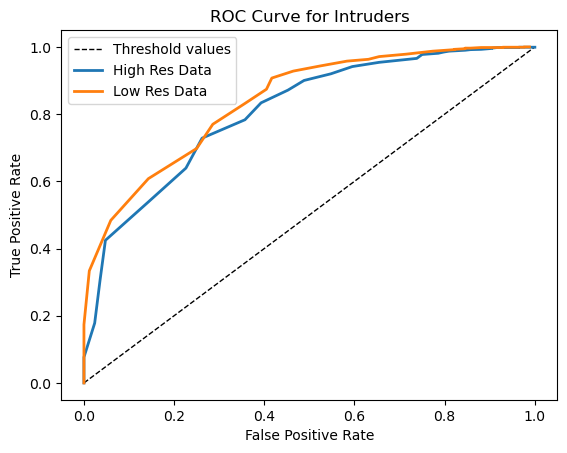

In [39]:
plt.title('ROC Curve for Intruders')
plt.plot(experiment_b.ROC_thresholds, experiment_b.ROC_thresholds,'--', lw=1, color='k', label='Threshold values')
plt.plot(experiment_b.false_positive_rate, experiment_b.true_positive_rate,lw=2, label='High Res Data')
plt.plot(experiment_d.false_positive_rate, experiment_d.true_positive_rate,lw=2, label='Low Res Data')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()